Removing unnecessary rows from Observer Table and plotting the missing values per column

In [2]:
import pandas as pd

# Load CSV
df_obs = pd.read_csv(r"OT_.csv")

# ----------------------------
# 1. Remove rows where both valid and reviewed are 0 (Observer Table, invalid rows removed)
# ----------------------------
df_cleaned = df_obs[~((df_obs['VALID'] == 0) & (df_obs['REVIEWED'] == 0))]

# ----------------------------
# 2. Save cleaned CSV
# ----------------------------
df_cleaned.to_csv(r"OT_valrev_row_rem.csv", index=False)

print(f"Original rows: {len(df_obs)}")
print(f"Rows after removing valid=0 & reviewed=0: {len(df_cleaned)}")


Original rows: 1048575
Rows after removing valid=0 & reviewed=0: 1042268


C:\Users\ausch\AppData\Local\Temp\ipykernel_22196\421001890.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='viridis')


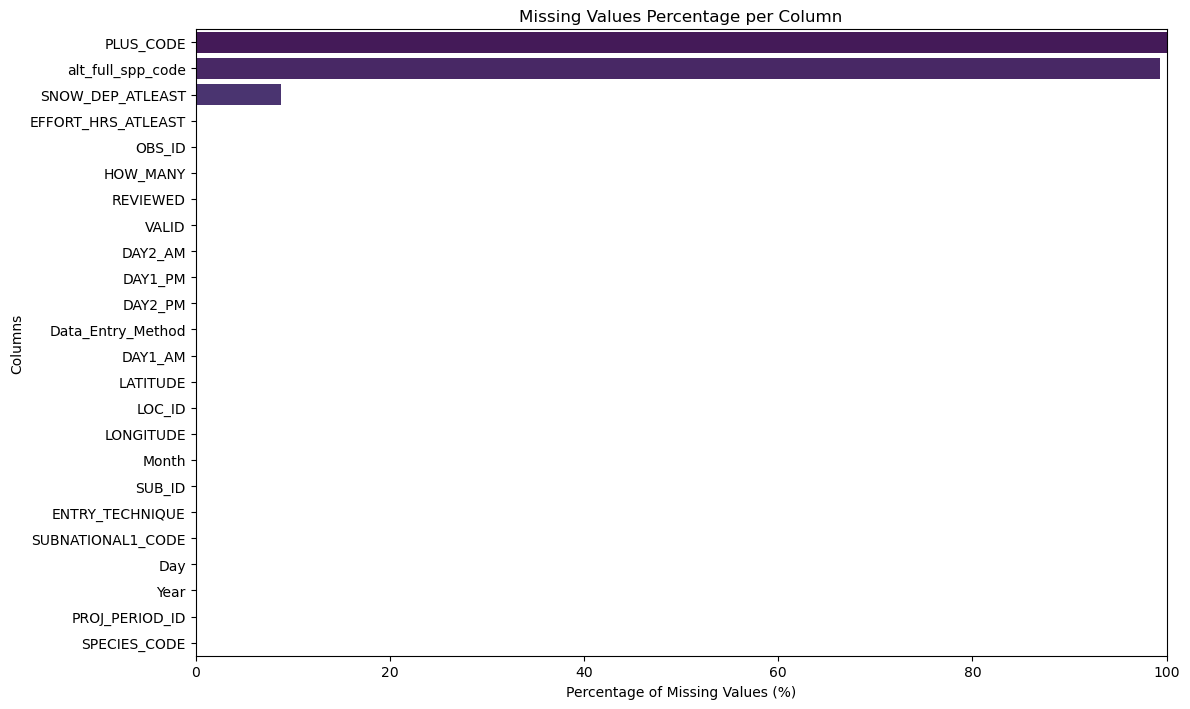

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Load CSV (Observer Table, missing values % per column)
# ----------------------------
df = pd.read_csv(r"OT_valrev_row_rem.csv")

# ----------------------------
# 2. Calculate % missing for each column
# ----------------------------
missing_percent = df.isna().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)  #sort by missing %

# ----------------------------
# 3. Plot horizontal bar plot
# ----------------------------
plt.figure(figsize=(12, max(6, len(df.columns)*0.3)))  # dynamic height
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='viridis')

plt.xlabel("Percentage of Missing Values (%)")
plt.ylabel("Columns")
plt.title("Missing Values Percentage per Column")
plt.xlim(0, 100)  # percentage scale
plt.tight_layout()
plt.show()


Removing unnecessary rows from Site Description Table and plotting the missing values per column

In [4]:
# Load CSV (Site description table, removal of years)
df = pd.read_csv(r"ST_.csv")

# ----------------------------
# 1. Define allowed years
# ----------------------------
allowed_years = ['2020', '2021', '2022', '2023', '2024']

# ----------------------------
# 2. Keep rows where proj_period_id contains allowed years
# Example: 'PFW_2022' → contains '2022'
# ----------------------------
df_filtered = df[df['proj_period_id'].str.extract(r'(\d{4})')[0].isin(allowed_years)]

# ----------------------------
# 3. Save cleaned CSV
# ----------------------------
df_filtered.to_csv(r"ST_year_row_rem.csv", index=False)

print(f"Original rows: {len(df)}")
print(f"Filtered rows (2020–2024): {len(df_filtered)}")


C:\Users\ausch\AppData\Local\Temp\ipykernel_22196\4241843956.py:2: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:/FUND/ST_.csv")


Original rows: 302560
Filtered rows (2020–2024): 72725


C:\Users\ausch\AppData\Local\Temp\ipykernel_22196\1597669656.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='viridis')


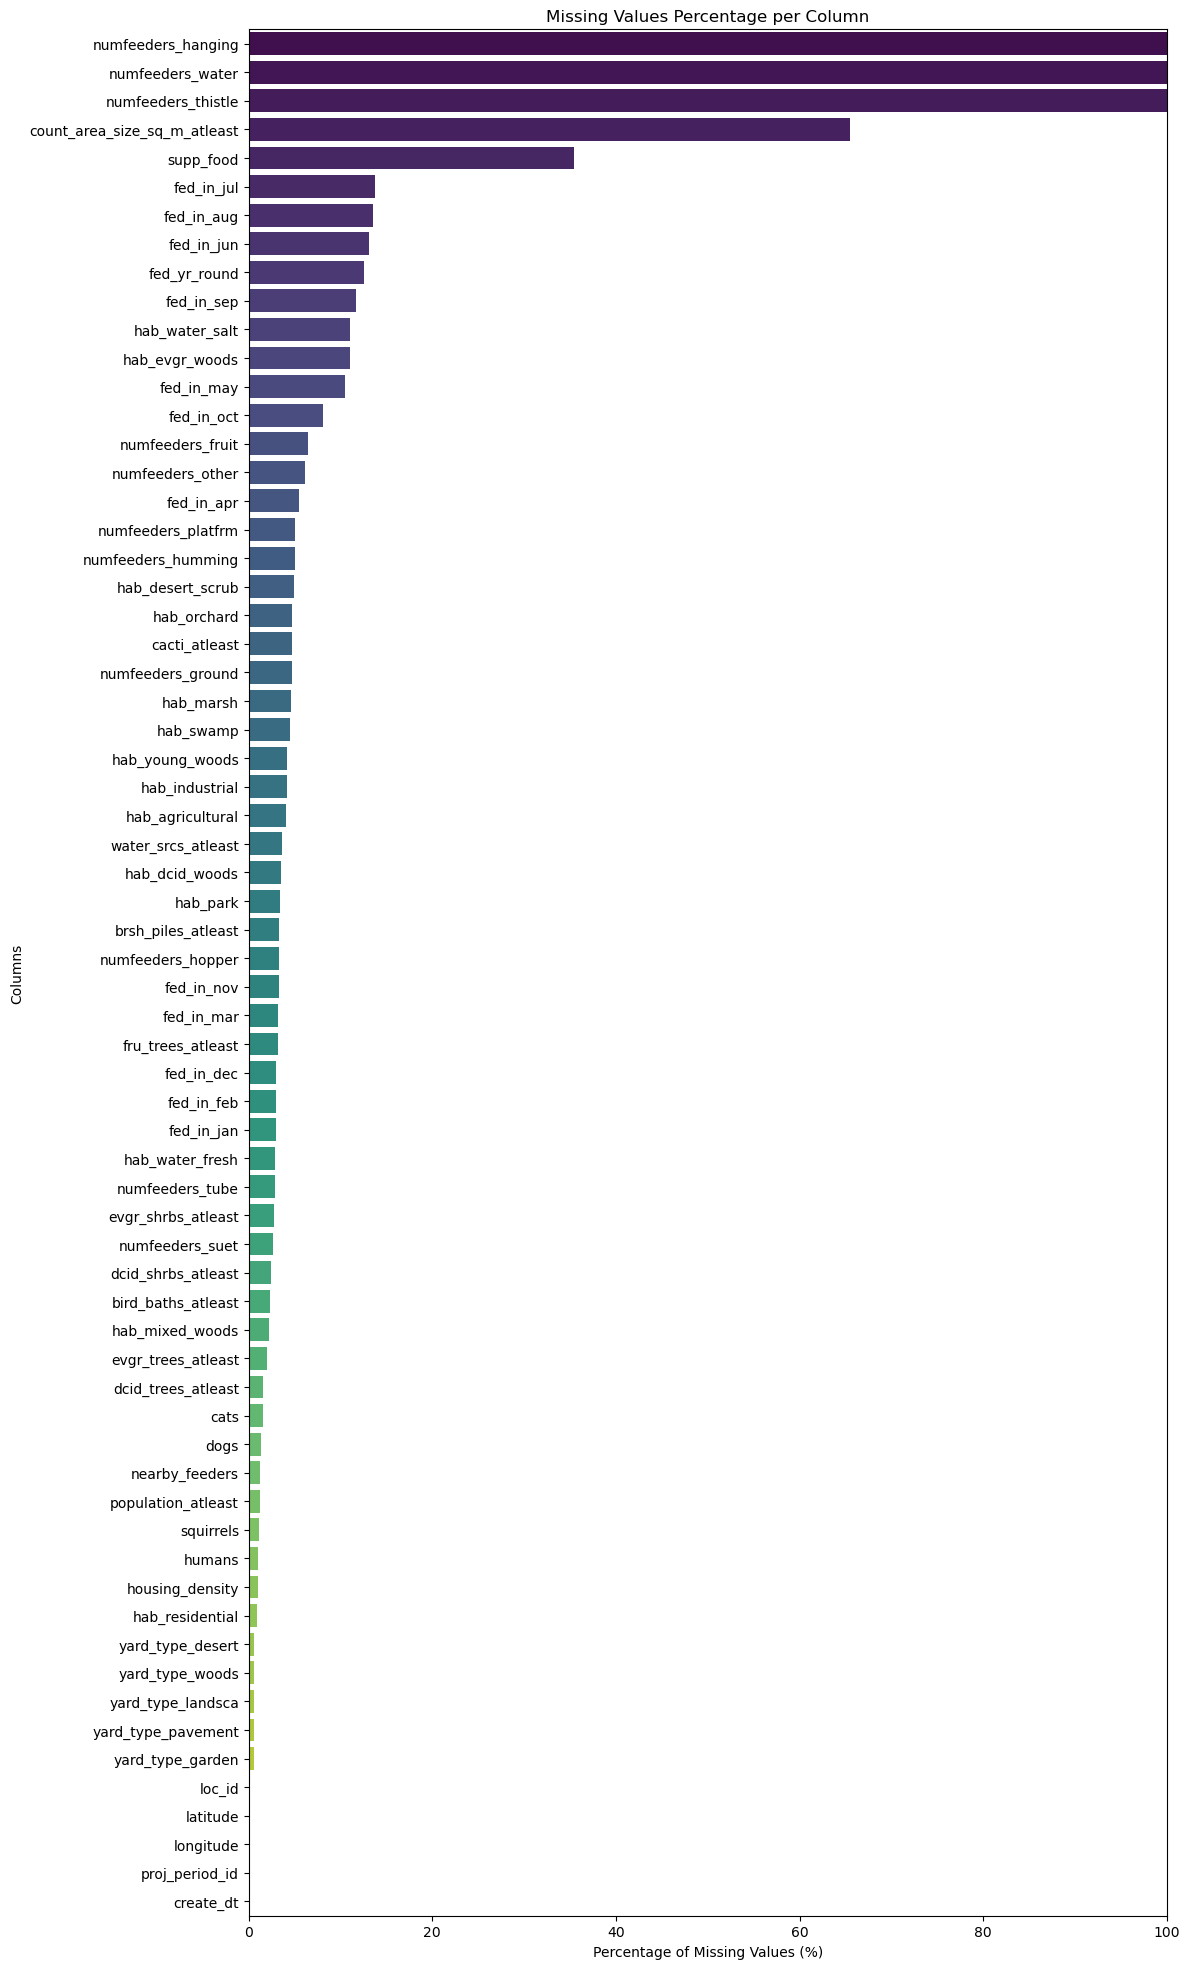

In [5]:
# ----------------------------
# 1. Load CSV (Site Description Table, missing values % per column)
# ----------------------------
df = pd.read_csv(r"ST_year_row_rem.csv")

# ----------------------------
# 2. Calculate % missing for each column
# ----------------------------
missing_percent = df.isna().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)  #sort by missing %

# ----------------------------
# 3. Plot horizontal bar plot
# ----------------------------
plt.figure(figsize=(12, max(6, len(df.columns)*0.3)))  # dynamic height
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='viridis')

plt.xlabel("Percentage of Missing Values (%)")
plt.ylabel("Columns")
plt.title("Missing Values Percentage per Column")
plt.xlim(0, 100)  # percentage scale
plt.tight_layout()
plt.show()


Dropping the Missing valued columns and unnecessary columns from both the tables

In [7]:
# Load CSV (Observer Table)(>70% Missing Values columns and unrelated columns dropped)
df = pd.read_csv(r"OT_valrev_row_rem.csv")

# Columns to drop
cols_to_drop = ['VALID', 'REVIEWED', 'PLUS_CODE', 'alt_full_spp_code', 'Data_Entry_Method']

# Drop columns
df = df.drop(columns=cols_to_drop)

# Optional: save the cleaned dataframe to a new CSV
df.to_csv(r"OT_row_column_cleaned_.csv", index=False)

print(f"Dropped columns: {cols_to_drop}")
print(f"Remaining columns: {df.columns.tolist()}")

Dropped columns: ['VALID', 'REVIEWED', 'PLUS_CODE', 'alt_full_spp_code', 'Data_Entry_Method']
Remaining columns: ['LOC_ID', 'LATITUDE', 'LONGITUDE', 'SUBNATIONAL1_CODE', 'ENTRY_TECHNIQUE', 'SUB_ID', 'OBS_ID', 'Month', 'Day', 'Year', 'PROJ_PERIOD_ID', 'SPECIES_CODE', 'HOW_MANY', 'DAY1_AM', 'DAY1_PM', 'DAY2_AM', 'DAY2_PM', 'EFFORT_HRS_ATLEAST', 'SNOW_DEP_ATLEAST']


In [8]:
# Load CSV (Site Description Table)(>70% Missing Values columns and unrelated columns dropped)
df = pd.read_csv(r"ST_year_row_rem.csv")

# Columns to drop
cols_to_drop = ['numfeeders_thistle', 'numfeeders_water', 'numfeeders_hanging', 'create_dt']

# Drop columns
df = df.drop(columns=cols_to_drop)

# Optional: save the cleaned dataframe to a new CSV
df.to_csv(r"OT_row_column_cleaned_.csv", index=False)

print(f"Dropped columns: {cols_to_drop}")
print(f"Remaining columns: {df.columns.tolist()}")

Dropped columns: ['numfeeders_thistle', 'numfeeders_water', 'numfeeders_hanging', 'create_dt']
Remaining columns: ['loc_id', 'latitude', 'longitude', 'proj_period_id', 'yard_type_pavement', 'yard_type_garden', 'yard_type_landsca', 'yard_type_woods', 'yard_type_desert', 'hab_dcid_woods', 'hab_evgr_woods', 'hab_mixed_woods', 'hab_orchard', 'hab_park', 'hab_water_fresh', 'hab_water_salt', 'hab_residential', 'hab_industrial', 'hab_agricultural', 'hab_desert_scrub', 'hab_young_woods', 'hab_swamp', 'hab_marsh', 'evgr_trees_atleast', 'evgr_shrbs_atleast', 'dcid_trees_atleast', 'dcid_shrbs_atleast', 'fru_trees_atleast', 'cacti_atleast', 'brsh_piles_atleast', 'water_srcs_atleast', 'bird_baths_atleast', 'nearby_feeders', 'squirrels', 'cats', 'dogs', 'humans', 'housing_density', 'fed_yr_round', 'fed_in_jan', 'fed_in_feb', 'fed_in_mar', 'fed_in_apr', 'fed_in_may', 'fed_in_jun', 'fed_in_jul', 'fed_in_aug', 'fed_in_sep', 'fed_in_oct', 'fed_in_nov', 'fed_in_dec', 'numfeeders_suet', 'numfeeders_ground

Imputing the missing values from both the tables

In [9]:
# ------------------------------------------
# 1. Load observation dataset, Imputing
# ------------------------------------------
df_obs = pd.read_csv(r"OT_row_column_cleaned_.csv")

# ------------------------------------------
# 2. Check missing %
# ------------------------------------------
missing_pct = df_obs['SNOW_DEP_ATLEAST'].isna().mean() * 100
print(f"Missing percentage for SNOW_DEP_ATLEAST: {missing_pct:.2f}%")

# ------------------------------------------
# 3. Check unique values
# ------------------------------------------
unique_vals = df_obs['SNOW_DEP_ATLEAST'].unique()
print("\nUnique values in SNOW_DEP_ATLEAST:")
print(unique_vals)

# ------------------------------------------
# 4. Check value counts
# ------------------------------------------
print("\nValue counts:")
print(df_obs['SNOW_DEP_ATLEAST'].value_counts(dropna=False))

# ------------------------------------------
# 5. Impute (numeric 10–20% missing → median)
# ------------------------------------------
median_val = df_obs['SNOW_DEP_ATLEAST'].median()
print(f"\nMedian used for imputation: {median_val}")

df_obs['SNOW_DEP_ATLEAST'].fillna(median_val, inplace=True)

# ------------------------------------------
# 6. Verify imputation
# ------------------------------------------
print("\nMissing after imputation:")
print(df_obs['SNOW_DEP_ATLEAST'].isna().sum())

# ------------------------------------------
# 7. Save to new CSV file
# ------------------------------------------
output_path = r"OT_Imputation.csv"  # <-- change path

df_obs.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")


Missing percentage for SNOW_DEP_ATLEAST: 8.82%

Unique values in SNOW_DEP_ATLEAST:
[5.0000e+00 1.5001e+01 1.0000e-03 0.0000e+00        nan]

Value counts:
SNOW_DEP_ATLEAST
0.000     643193
0.001     124759
5.000     103063
NaN        91922
15.001     79331
Name: count, dtype: int64

Median used for imputation: 0.0

Missing after imputation:
0


C:\Users\ausch\AppData\Local\Temp\ipykernel_22196\2949585383.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_obs['SNOW_DEP_ATLEAST'].fillna(median_val, inplace=True)



Cleaned dataset saved to: OT_Imputation.csv


In [10]:
import pandas as pd

# Load cleaned site description dataset, Imputing
df = pd.read_csv("ST_row_column_cleaned_.csv")

# ----------------------------------------------------
# 1. Lists of columns by type
# ----------------------------------------------------

# (A) Binary 0/1 columns → use MODE
binary_cols = [
    "yard_type_pavement", "yard_type_garden", "yard_type_landsca", "yard_type_woods",
    "yard_type_desert", "hab_dcid_woods", "hab_evgr_woods", "hab_mixed_woods",
    "hab_orchard", "hab_park", "hab_water_fresh", "hab_water_salt",
    "hab_residential", "hab_industrial", "hab_agricultural", "hab_desert_scrub",
    "hab_young_woods", "hab_swamp", "hab_marsh", "nearby_feeders", "squirrels",
    "cats", "dogs", "humans", "fed_yr_round", "fed_in_jan", "fed_in_feb",
    "fed_in_mar", "fed_in_apr", "fed_in_may", "fed_in_jun", "fed_in_jul",
    "fed_in_aug", "fed_in_sep", "fed_in_oct", "fed_in_nov", "fed_in_dec",
    "supp_food"
]

# (B) Ordinal 0,1,3,4,11 groups → use MEDIAN
ordinal_cols = [
    "evgr_trees_atleast", "evgr_shrbs_atleast", "dcid_trees_atleast",
    "dcid_shrbs_atleast", "fru_trees_atleast", "cacti_atleast",
    "brsh_piles_atleast", "water_srcs_atleast", "bird_baths_atleast"
]

# (C) Count-based feeders → use MEDIAN
count_cols = [
    "numfeeders_suet", "numfeeders_ground", "numfeeders_platfrm",
    "numfeeders_humming", "numfeeders_fruit", "numfeeders_hopper",
    "numfeeders_tube", "numfeeders_other"
]

# (D) Other numeric columns → use MEDIAN
other_numeric = [
    "population_atleast",
    "count_area_size_sq_m_atleast",
    "housing_density"
]

# ----------------------------------------------------
# 2. Impute values
# ----------------------------------------------------

# Mode imputation (for binary)
for col in binary_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Median imputation (ordinal, counts, numeric)
for col in ordinal_cols + count_cols + other_numeric:
    df[col] = df[col].fillna(df[col].median())

# ----------------------------------------------------
# 3. Save the imputed file
# ----------------------------------------------------
df.to_csv("ST_imputed_final.csv", index=False)

print("Imputation complete. File saved as ST_imputed_final.csv")


Imputation complete. File saved as ST_imputed_final.csv


Merging the two tables

In [21]:
#Merging the datasets

# Load observation dataset
observations = pd.read_csv("OT_Imputation.csv")

# Load site dataset
sites = pd.read_csv("ST_imputed_final.csv")

# Make all column names lowercase (helps avoid errors)
observations.columns = observations.columns.str.lower()
sites.columns = sites.columns.str.lower()

# Merge using lowercase names
df = observations.merge(sites, on=["loc_id", "proj_period_id"], how="left")
print("Merged dataset shape:", df.shape)

# Save merged DataFrame to CSV
df.to_csv("merged_dataset.csv", index=False)

print("Merged dataset saved as merged_dataset.csv")

Merged dataset shape: (1042268, 79)
Merged dataset saved as merged_dataset.csv


Checking missing values for the merged data

C:\Users\ausch\AppData\Local\Temp\ipykernel_22196\1999517506.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='viridis')


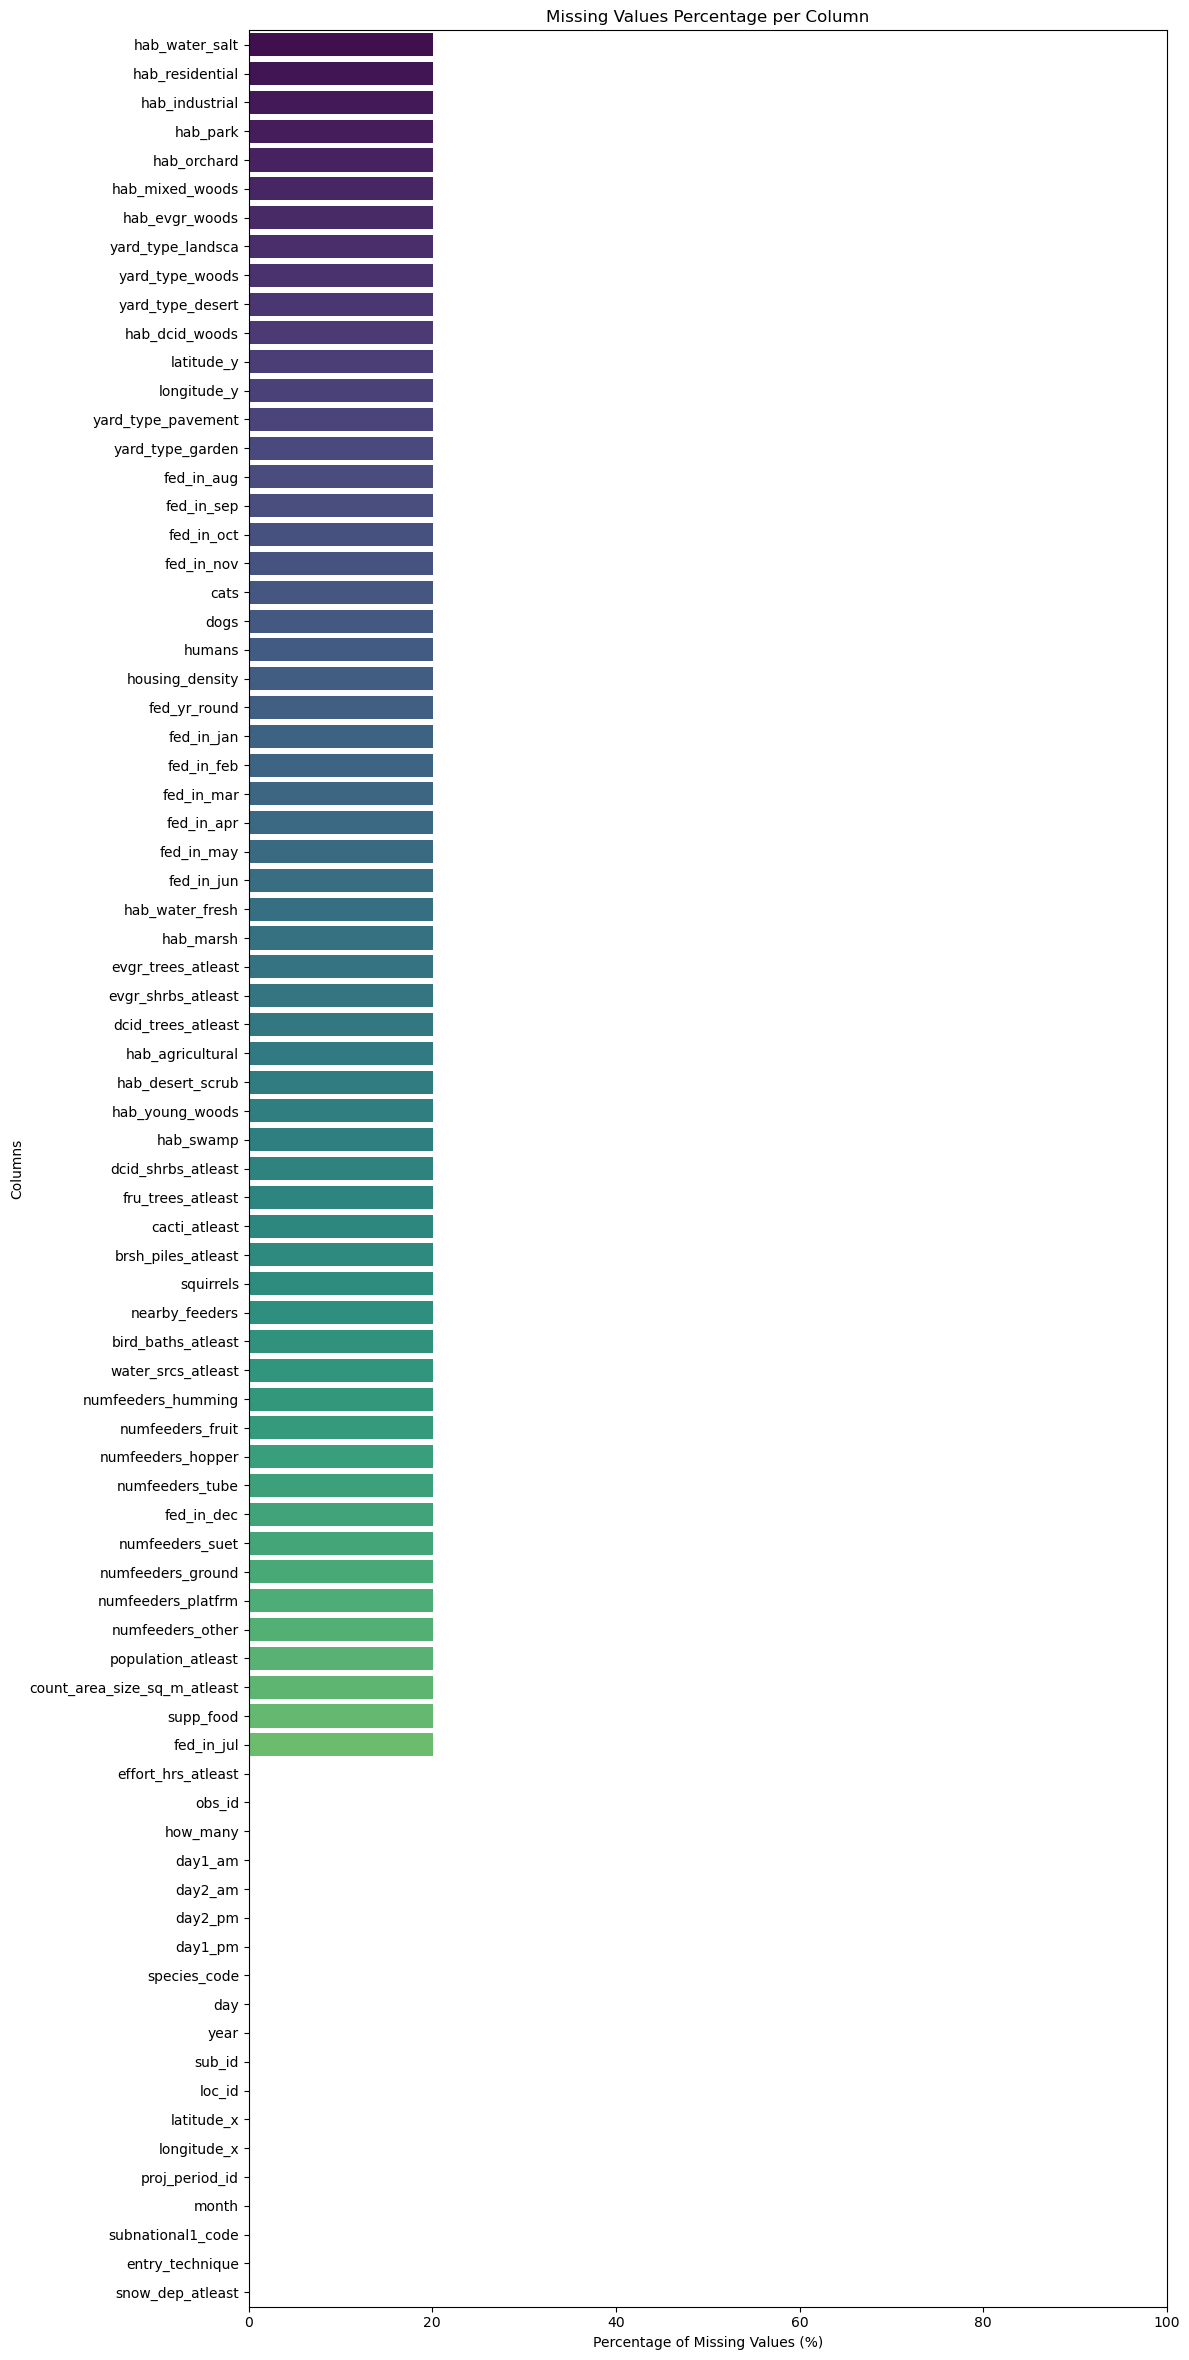

In [13]:
# ----------------------------
# 1. Load CSV(checking missing values for the merged data)
# ----------------------------
df = pd.read_csv(r"D:/FUND/Merged/merged.csv")

# ----------------------------
# 2. Calculate % missing for each column
# ----------------------------
missing_percent = df.isna().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)  #sort by missing %

# ----------------------------
# 3. Plot horizontal bar plot
# ----------------------------
plt.figure(figsize=(12, max(6, len(df.columns)*0.3)))  # dynamic height
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='viridis')

plt.xlabel("Percentage of Missing Values (%)")
plt.ylabel("Columns")
plt.title("Missing Values Percentage per Column")
plt.xlim(0, 100)  # percentage scale
plt.tight_layout()
plt.show()


Dropping the columns from the merged data that do not add any difference while training

In [11]:
# Load the merged CSV
df = pd.read_csv("D:/FUND/Merged/merged.csv")

# Columns that dont add any efficiency for training
cols_to_drop = [
    "fed_in_jan", "fed_in_feb", "fed_in_mar", "fed_in_apr", "fed_in_may",
    "fed_in_jun", "fed_in_jul", "fed_in_aug", "fed_in_sep", "fed_in_oct",
    "fed_in_nov", "fed_in_dec",
    "numfeeders_suet", "numfeeders_ground", "numfeeders_platfrm",
    "numfeeders_humming", "numfeeders_fruit", "numfeeders_hopper",
    "numfeeders_tube", "numfeeders_other"
]

# Drop columns safely (ignore errors if a column is missing)
df_clean = df.drop(columns=cols_to_drop, errors='ignore')

# Save new CSV
output_path = "merged_cleaned.csv"
df_clean.to_csv(output_path, index=False)

print("New CSV saved as:", output_path)


New CSV saved as: merged_cleaned.csv


Imputing the values for all the columns with missing values

In [15]:
from sklearn.impute import SimpleImputer
# -----------------------------
# 1. Load merged cleaned CSV
# -----------------------------
df = pd.read_csv("D:/FUND/Merged/merged_cleaned.csv")

# -----------------------------
# 2. Find columns with >=20% missing
# -----------------------------
missing_percent = df.isna().mean() * 100
cols_with_missing_20 = missing_percent[missing_percent >= 20].index.tolist()

print("Columns with >=20% missing:")
print(cols_with_missing_20)

# -----------------------------
# 3. Separate numeric and categorical columns
# -----------------------------
numeric_cols = df[cols_with_missing_20].select_dtypes(include=['number']).columns
categorical_cols = df[cols_with_missing_20].select_dtypes(exclude=['number']).columns

print("\nNumeric columns to impute (median):", list(numeric_cols))
print("Categorical columns to impute (mode):", list(categorical_cols))

# -----------------------------
# 4. Impute numeric columns with median
# -----------------------------
if len(numeric_cols) > 0:
    num_imputer = SimpleImputer(strategy="median")
    df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# -----------------------------
# 5. Impute categorical columns with mode
# -----------------------------
if len(categorical_cols) > 0:
    cat_imputer = SimpleImputer(strategy="most_frequent")
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# -----------------------------
# 6. Save the imputed dataset
# -----------------------------
output_path = "merged_imputed.csv"
df.to_csv(output_path, index=False)

print("\nImputed file saved as:", output_path)


Columns with >=20% missing:
['latitude_y', 'longitude_y', 'yard_type_pavement', 'yard_type_garden', 'yard_type_landsca', 'yard_type_woods', 'yard_type_desert', 'hab_dcid_woods', 'hab_evgr_woods', 'hab_mixed_woods', 'hab_orchard', 'hab_park', 'hab_water_fresh', 'hab_water_salt', 'hab_residential', 'hab_industrial', 'hab_agricultural', 'hab_desert_scrub', 'hab_young_woods', 'hab_swamp', 'hab_marsh', 'evgr_trees_atleast', 'evgr_shrbs_atleast', 'dcid_trees_atleast', 'dcid_shrbs_atleast', 'fru_trees_atleast', 'cacti_atleast', 'brsh_piles_atleast', 'water_srcs_atleast', 'bird_baths_atleast', 'nearby_feeders', 'squirrels', 'cats', 'dogs', 'humans', 'housing_density', 'fed_yr_round', 'population_atleast', 'count_area_size_sq_m_atleast', 'supp_food']

Numeric columns to impute (median): ['latitude_y', 'longitude_y', 'yard_type_pavement', 'yard_type_garden', 'yard_type_landsca', 'yard_type_woods', 'yard_type_desert', 'hab_dcid_woods', 'hab_evgr_woods', 'hab_mixed_woods', 'hab_orchard', 'hab_park

Grouping all the entries to find out on specific bird that is mallar3 in this case

In [17]:
#Grouping mallar3 birds(ducks)
# Load the imputed merged file
df = pd.read_csv("D:/FUND/Merged/merged_imputed.csv")

# Create mallar3 presence/absence
df['mallar3'] = (df['species_code'] == 'mallar3').astype(int)

# Grouping keys
keys = ['loc_id', 'month', 'day', 'year']

# Define aggregation rules
agg_rules = {}

for col in df.columns:
    if col in keys:
        continue
    
    elif col == 'mallar3':
        agg_rules[col] = 'max'   # presence 1 if any row has mallar3
    
    elif pd.api.types.is_numeric_dtype(df[col]):
        agg_rules[col] = 'max'   # choose max for numeric columns
    
    else:
        agg_rules[col] = 'first' # choose first value for categorical columns

# Apply grouping
df_grouped = df.groupby(keys, as_index=False).agg(agg_rules)

# Print counts
print("mallar3 = 1:", (df_grouped['mallar3'] == 1).sum())
print("mallar3 = 0:", (df_grouped['mallar3'] == 0).sum())

# Save final CSV
df_grouped.to_csv("mallar3_presence_full.csv", index=False)

print("Done! New file saved as mallar3_presence_full.csv")


mallar3 = 1: 1221
mallar3 = 0: 88714
Done! New file saved as mallar3_presence_full.csv


Univariate plots for some features

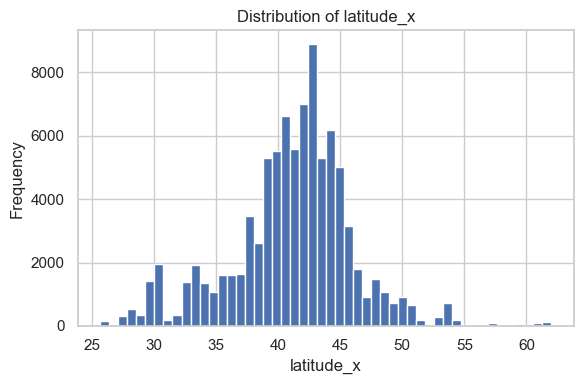

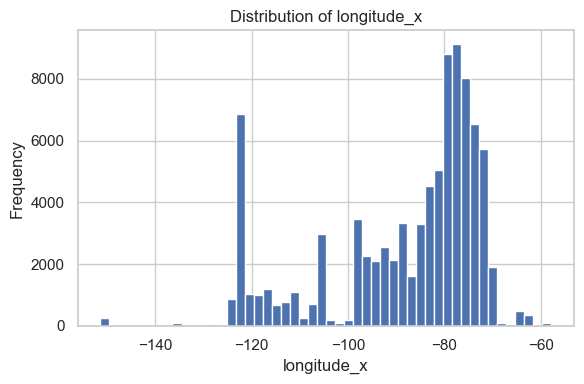

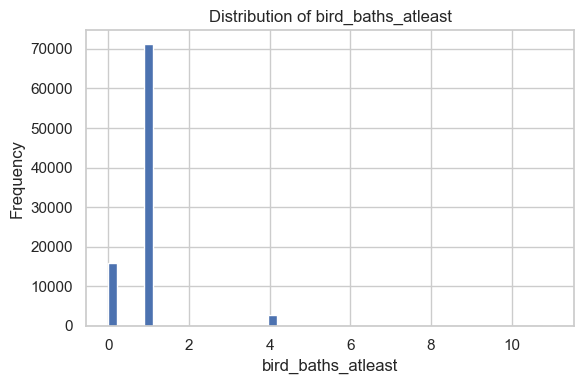

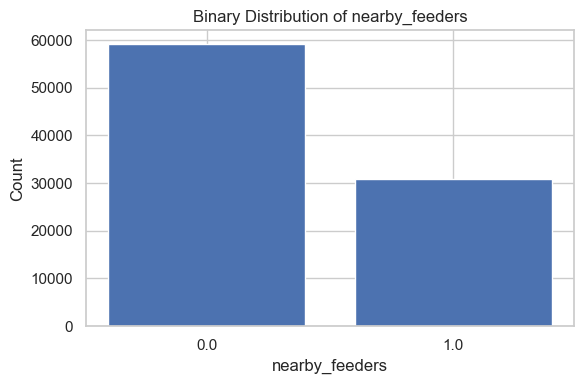

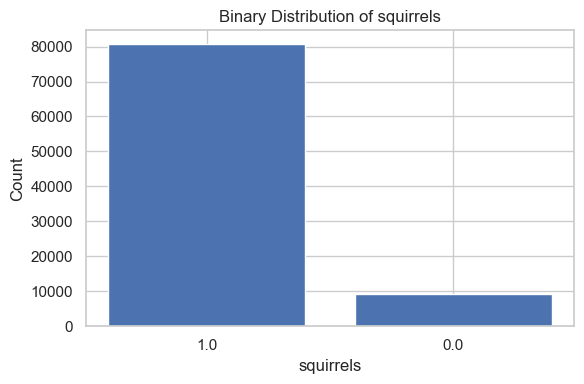

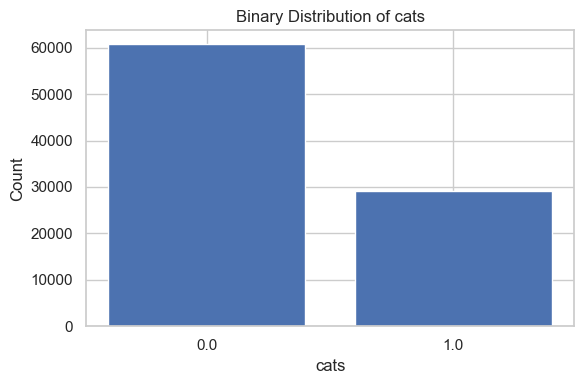

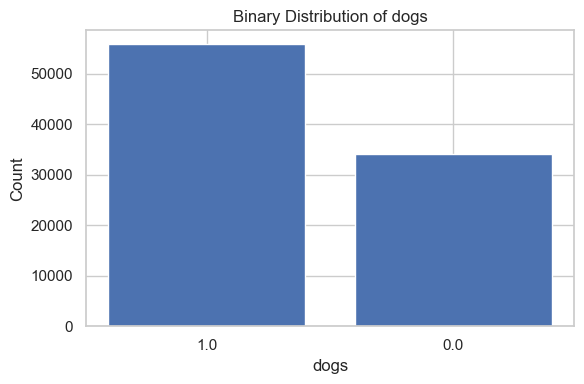

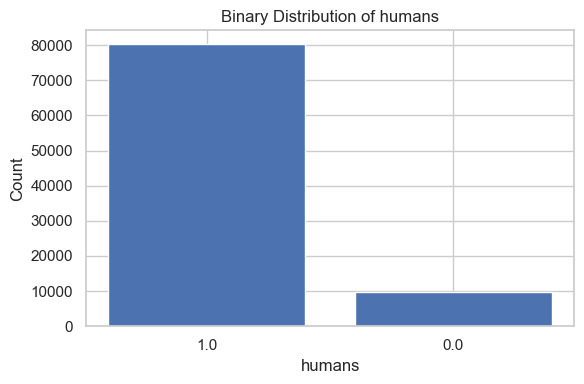

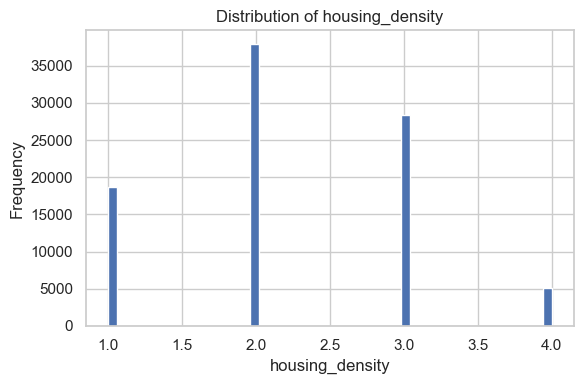

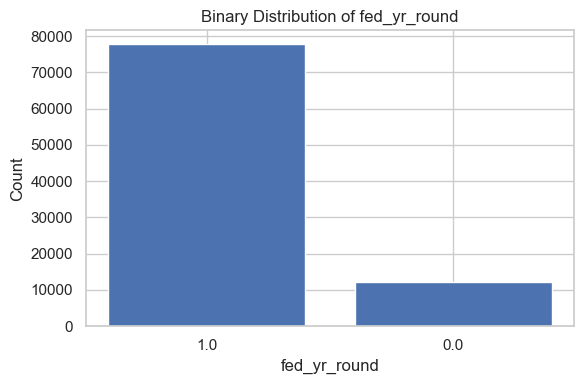

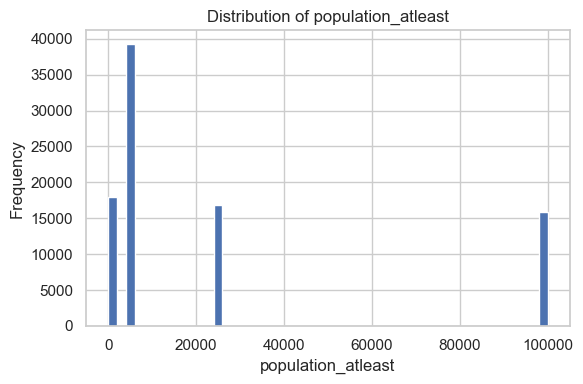

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load file
df = pd.read_csv("mallar3_presence_full.csv")

cols_to_plot = [
    "latitude_x", "longitude_x", "bird_baths_atleast", "nearby_feeders",
    "squirrels", "cats", "dogs", "humans", "housing_density",
    "fed_yr_round", "population_atleast"
]

def is_binary(series):
    unique_vals = series.dropna().unique()
    return len(unique_vals) <= 2 and set(unique_vals).issubset({0,1})

plt.ion()  # ensures immediate display

for col in cols_to_plot:
    data = df[col]

    plt.figure(figsize=(6, 4))

    # Numeric but not binary
    if np.issubdtype(data.dtype, np.number) and not is_binary(data):
        plt.hist(data.dropna(), bins=50)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")

    # Binary 0/1
    elif np.issubdtype(data.dtype, np.number) and is_binary(data):
        counts = data.value_counts()
        plt.bar(counts.index.astype(str), counts.values)
        plt.title(f"Binary Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")

    plt.tight_layout()
    plt.show()


Bivariate: Cramer's V coefficient matrix for the selected features

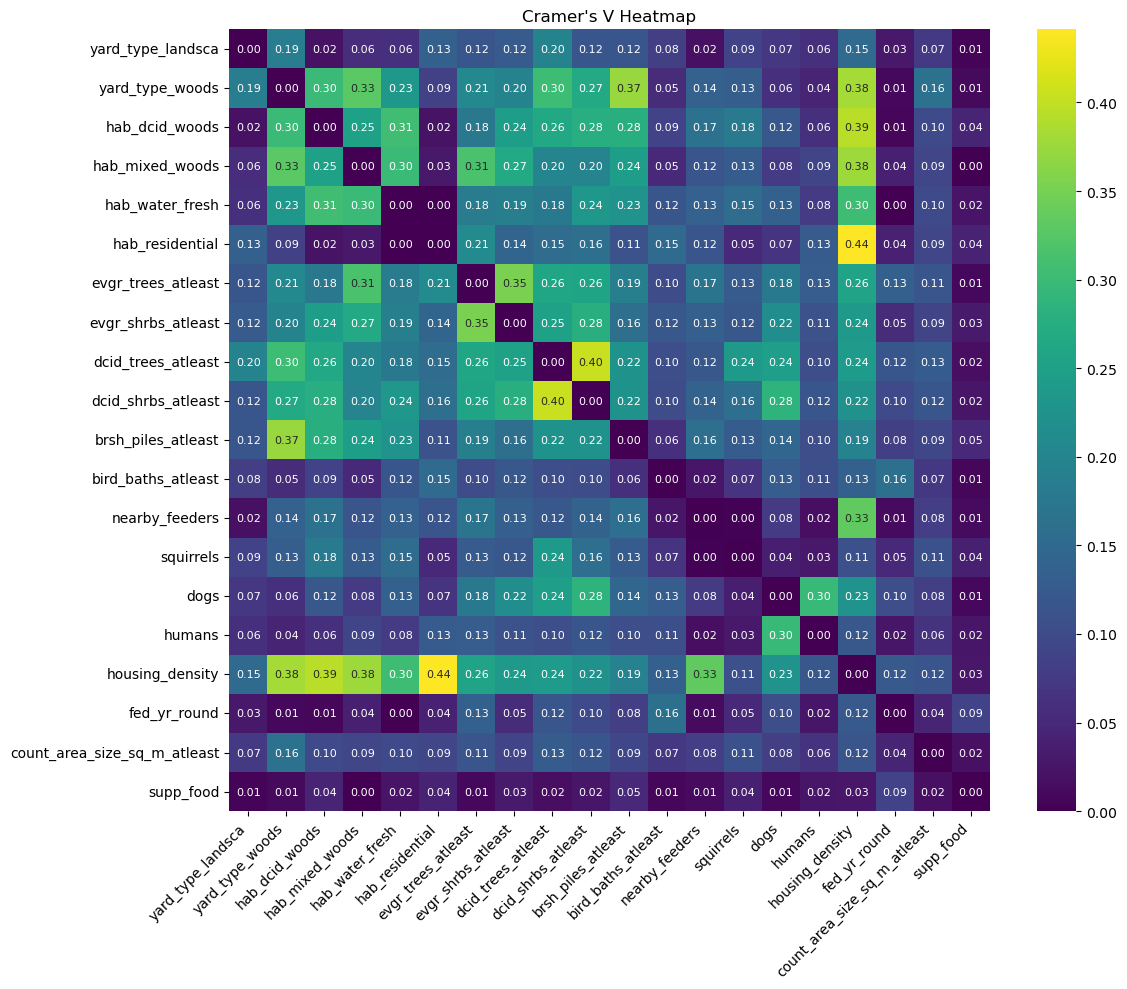

In [20]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import itertools
import numpy as np

data = pd.read_csv("D:/FUND/Merged/merged_imputed.csv", low_memory=False)

data.drop((["latitude_x", "longitude_x", "latitude_y", "longitude_y"]), axis =1, inplace=True) #Should inplace be True?

catdf = data
label_encoder = LabelEncoder()
for col in data.columns:
    catdf[col] = label_encoder.fit_transform(data[col])

catdf.columns

#cutting down the number of columns for the heatmap
catdf = catdf[['yard_type_landsca', 'yard_type_woods', 'hab_dcid_woods', 'hab_mixed_woods', 'hab_water_fresh', 'hab_residential', 'evgr_trees_atleast', 'evgr_shrbs_atleast', 'dcid_trees_atleast', 'dcid_shrbs_atleast', 'brsh_piles_atleast', 'bird_baths_atleast', 'nearby_feeders', 'squirrels', 'dogs', 'humans', 'housing_density', 'fed_yr_round', 'count_area_size_sq_m_atleast', 'supp_food']]

# Function to calculate Cramer's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Assuming catdf is your categorical dataframe
cols = catdf.columns
n_cols = len(cols)

# Initialize correlation matrix
corrM = np.zeros((n_cols, n_cols))

# Calculate Cramer's V for all combinations
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = list(cols).index(col1), list(cols).index(col2)
    corrM[idx1, idx2] = cramers_v(pd.crosstab(catdf[col1], catdf[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

# Convert to DataFrame
corr_df = pd.DataFrame(corrM, index=cols, columns=cols)

# Dynamic figure size
plt.figure(figsize=(max(12, n_cols*0.5), max(10, n_cols*0.5)))

# Plot heatmap
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    cbar=True,
    annot_kws={"size": 8}  # smaller font for large matrices
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Cramer's V Heatmap")
plt.tight_layout()
plt.savefig("cramers_v_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

Mutual Information Scores for the 20 features selected

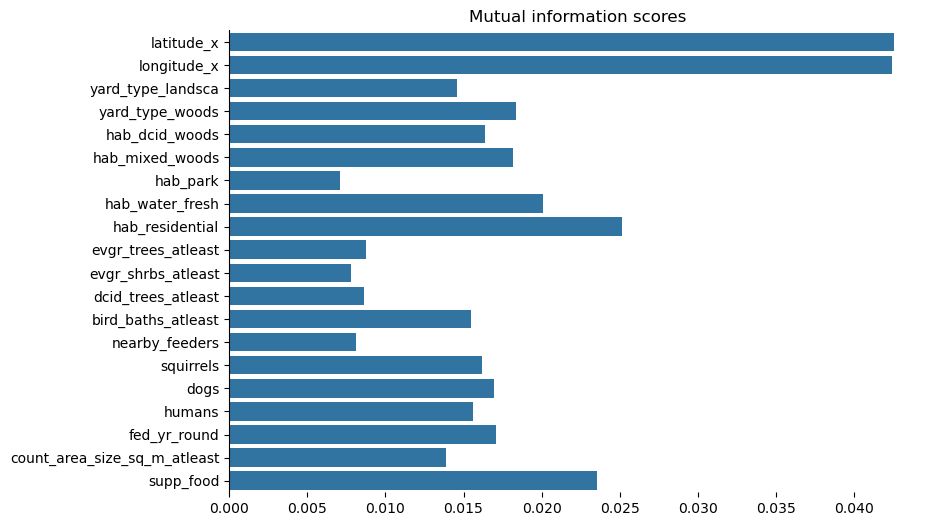

In [22]:
#USE the final features for this, below:
'''
Selected feature names: ['latitude_x', 'longitude_x', 'yard_type_landsca', 'yard_type_woods', 'hab_dcid_woods', 'hab_mixed_woods', 'hab_park', 'hab_water_fresh', 'hab_residential', 'evgr_trees_atleast', 'evgr_shrbs_atleast', 'dcid_trees_atleast', 'bird_baths_atleast', 'nearby_feeders', 'squirrels', 'dogs', 'humans', 'fed_yr_round', 'count_area_size_sq_m_atleast', 'supp_food']
Scores: [0.04252802 0.04241941 0.01459091 0.01835039 0.01637743 0.01817921
 0.00711284 0.02006977 0.02511962 0.00878171 0.00778176 0.00862975
 0.01547966 0.00811671 0.01617358 0.01693367 0.01558346 0.01709857
 0.0138569  0.02355896]'''


#mutual information scores
#maybe put in data frame for sorting
features = ['latitude_x', 'longitude_x', 'yard_type_landsca', 'yard_type_woods', 'hab_dcid_woods', 'hab_mixed_woods', 'hab_park', 'hab_water_fresh', 'hab_residential', 'evgr_trees_atleast', 'evgr_shrbs_atleast', 'dcid_trees_atleast', 'bird_baths_atleast', 'nearby_feeders', 'squirrels', 'dogs', 'humans', 'fed_yr_round', 'count_area_size_sq_m_atleast', 'supp_food']
mutual_information = [0.04252802, 0.04241941, 0.01459091, 0.01835039, 0.01637743, 0.01817921,
 0.00711284, 0.02006977, 0.02511962, 0.00878171, 0.00778176, 0.00862975,
 0.01547966, 0.00811671, 0.01617358, 0.01693367, 0.01558346, 0.01709857,
 0.0138569,  0.02355896]


fig, ax = plt.subplots(figsize=(9, 6)) 
sns.barplot(y=features, x=mutual_information, errorbar=None, orient = 'h', width = 0.8, ax=ax)
#ax.bar_label(ax.containers[0],  fmt='%.0f', fontsize=8, padding=2)
sns.despine()
ax.spines["bottom"].set_visible(False)
ax.set(title= "Mutual information scores")#, xlabel = "Features")
plt.savefig("Mutual_Information.png", dpi=300, bbox_inches='tight')
#ax.set_ylabel("Year", rotation=0, ha='right')